# Solar Investment Strategy for MoonLight Energy Solutions

Environment setup

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from windrose import WindroseAxes

Data Upload

In [51]:
# df= for Benion Data
df = pd.read_csv('../data/benin-malanville.csv')
# df1= for Sierraleone
df1 = pd.read_csv('../data/sierraleone-bumbuna.csv')
# df2= for Togo
df2 = pd.read_csv('../data/togo-dapaong_qc.csv')

df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


Stastics summary for Benin

In [52]:
summary_df = df.describe()
print(summary_df)

                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      240.559452     167.187516     115.358961     236.589496   
std       331.131327     261.710501     158.691074     326.894859   
min       -12.900000      -7.800000     -12.600000       0.000000   
25%        -2.000000      -0.500000      -2.100000       0.000000   
50%         1.800000      -0.100000       1.600000       4.500000   
75%       483.400000     314.200000     216.300000     463.700000   
max      1413.000000     952.300000     759.200000    1342.300000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      228.883576      28.179683      54.487969       2.121113   
std       316.536515       5.924297      28.073069       1.603466   
min         0.000000      11.000000       2.100000       0.000000   
25%         0.000000      24.2000

Missing Values for Benin Data

In [53]:
missing_values_df = df.isnull().sum()
print("Missing Values for Benin:\n", missing_values_df)

Missing Values for Benin:
 Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64


Heat map of missed valuesedVisualization for Benin Data

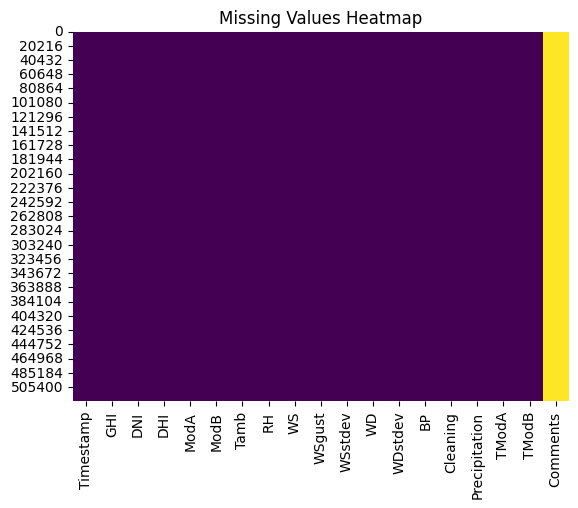

In [56]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

Box Plots for Benion Data

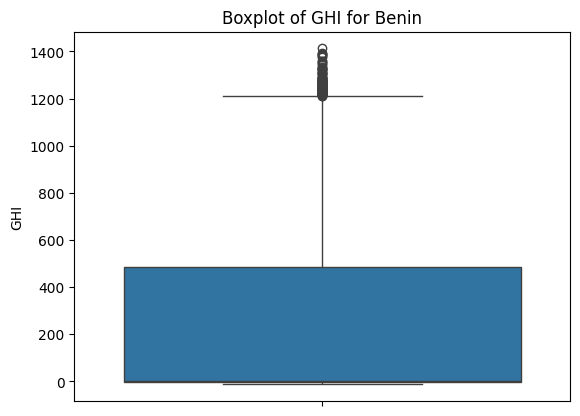

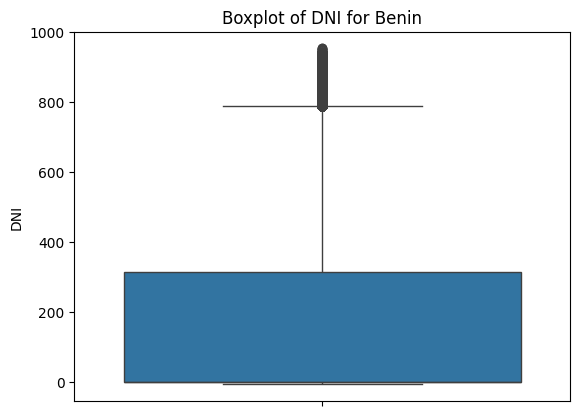

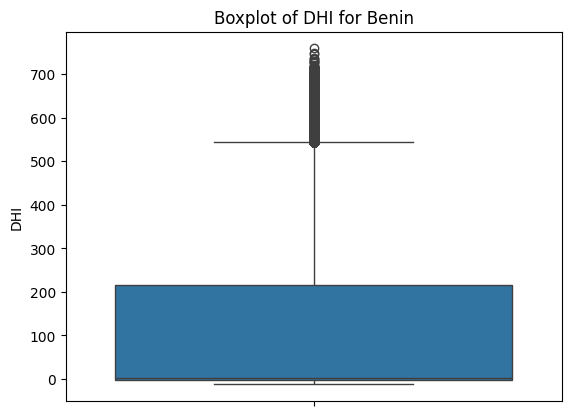

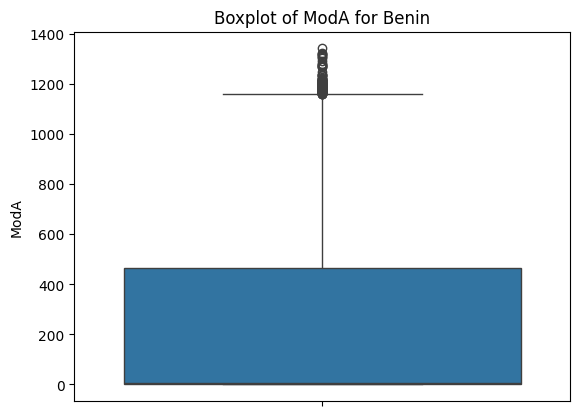

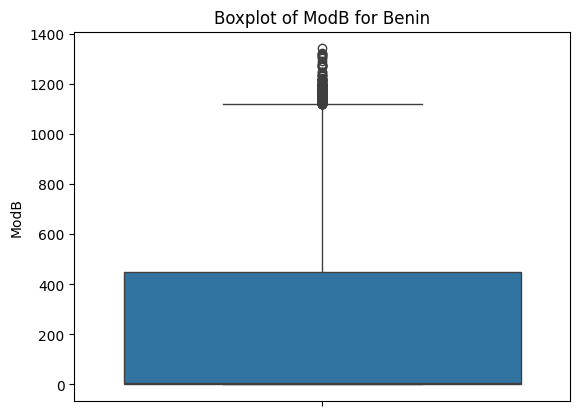

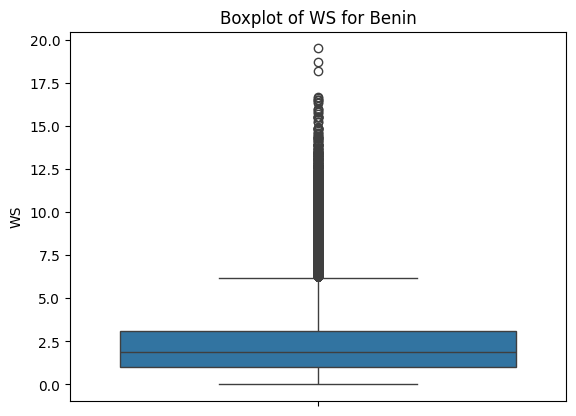

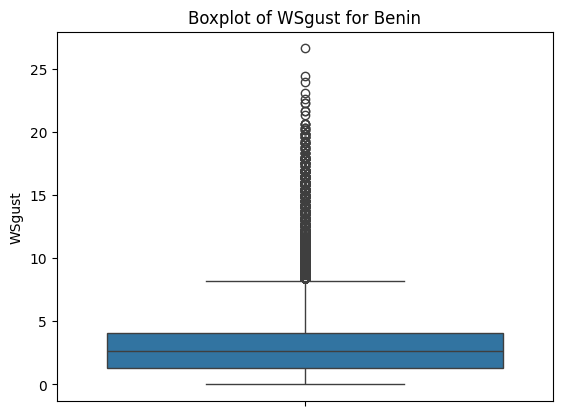

In [57]:
#Using boxplots
columns_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
for col in columns_to_check:
    sns.boxplot(data=df[col])
    plt.title(f"Boxplot of {col} for Benin")
    plt.show()


Checking of the Negative values for Benin Data

In [58]:
negative_values = df[columns_to_check].lt(0).sum()
print("Negative Values:\n", negative_values)

Negative Values:
 GHI       258847
DNI       275987
DHI       259182
ModA           0
ModB           0
WS             0
WSgust         0
dtype: int64


Time Serious Analysis for Benin Data

c:\Users\Henok\Desktop\Week 0\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


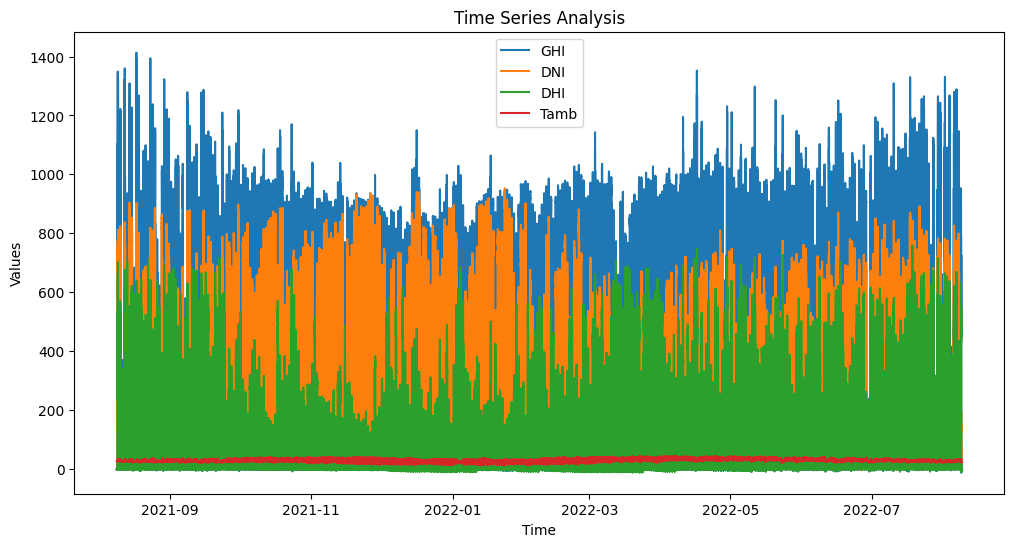

In [59]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Plotting
plt.figure(figsize=(12, 6))
for col in ['GHI', 'DNI', 'DHI', 'Tamb']:
    plt.plot(df['Timestamp'], df[col], label=col)
plt.legend()
plt.title("Time Series Analysis")
plt.xlabel("Time")
plt.ylabel("Values")
plt.show()


Correlation Matrix for Benin

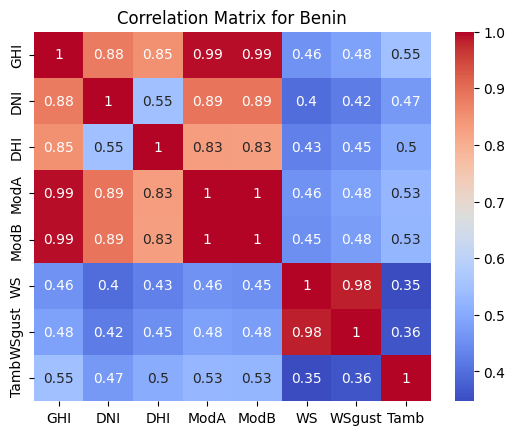

In [60]:

correlation_matrix = df[['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust', 'Tamb']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix for Benin")
plt.show()

Pairplot for Benin Data

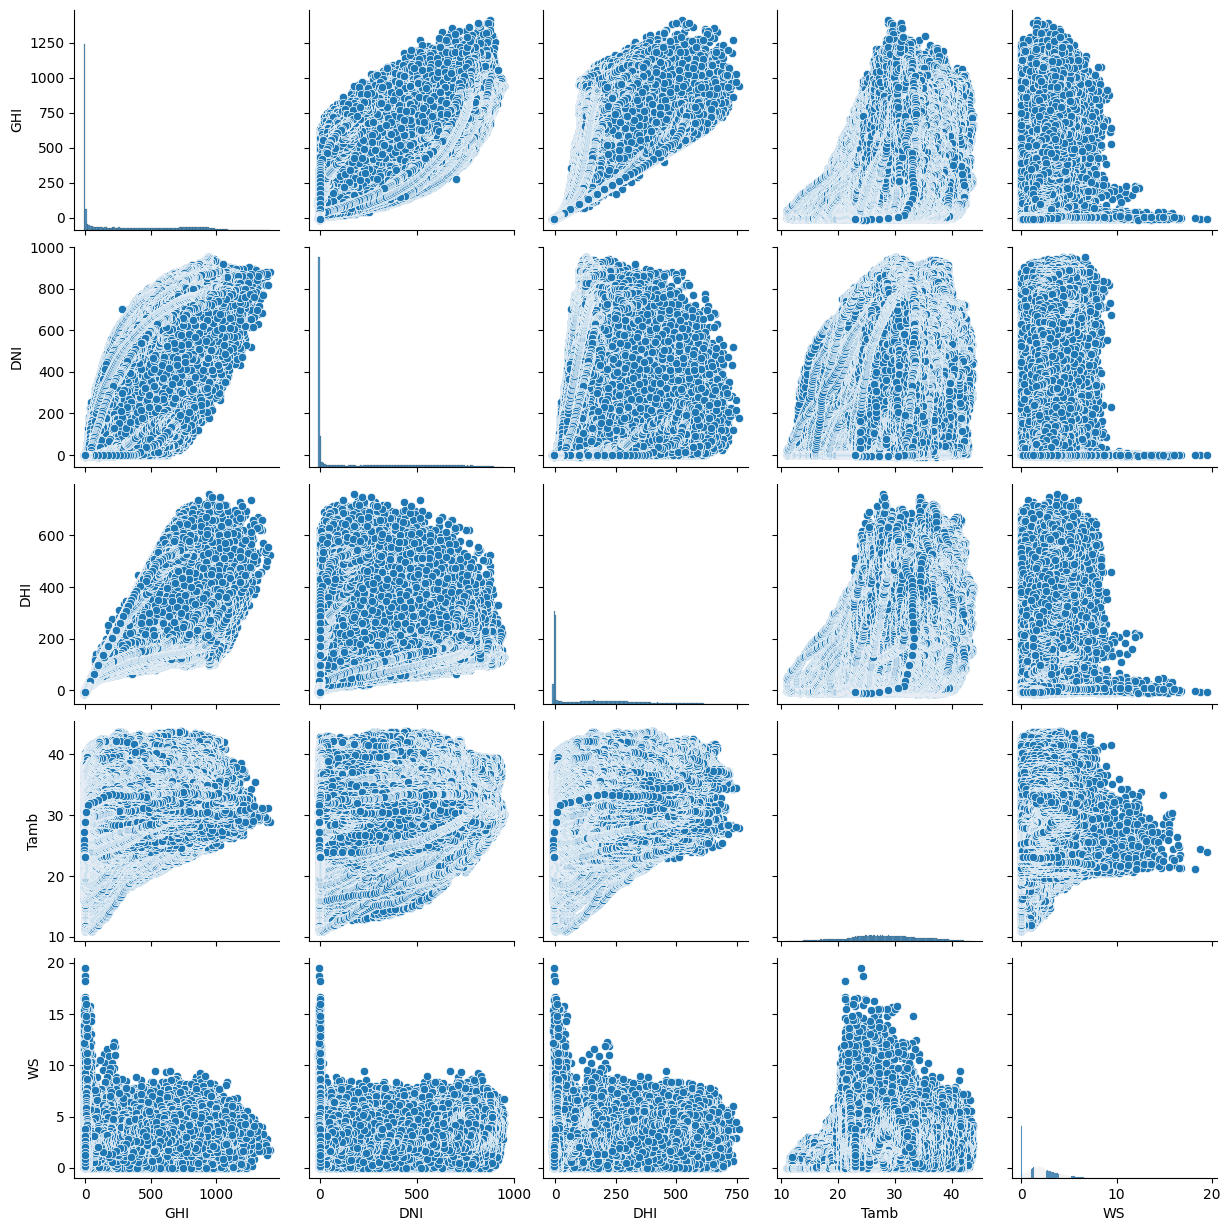

In [61]:
sns.pairplot(df[['GHI', 'DNI', 'DHI', 'Tamb', 'WS']])
plt.show()

Wind Analysis

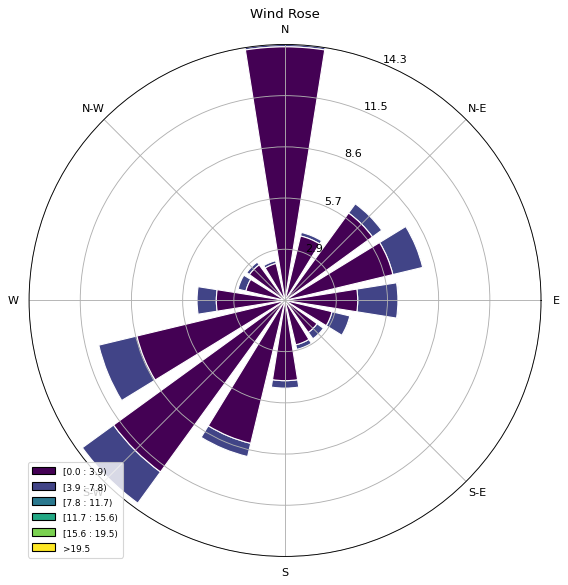

In [62]:

ax = WindroseAxes.from_ax()
ax.bar(df['WD'], df['WS'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
plt.title("Wind Rose")
plt.show()


Temperature Analysis

c:\Users\Henok\Desktop\Week 0\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


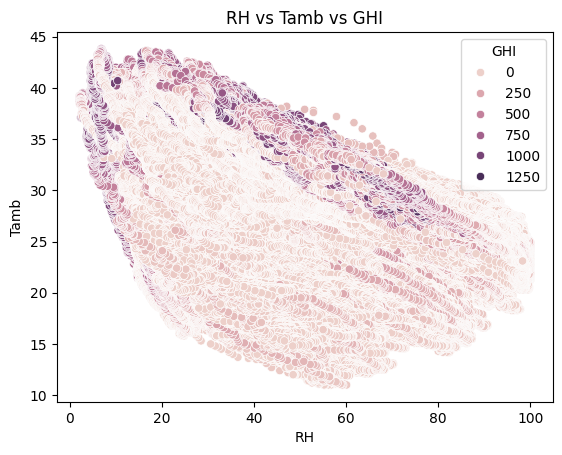

In [63]:
sns.scatterplot(data=df, x='RH', y='Tamb', hue='GHI')
plt.title("RH vs Tamb vs GHI")
plt.show()

Histogram

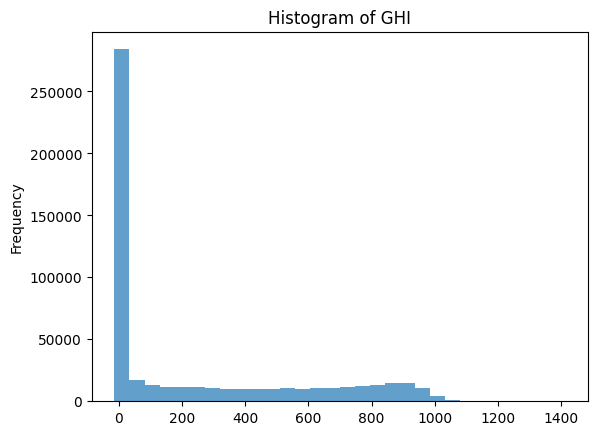

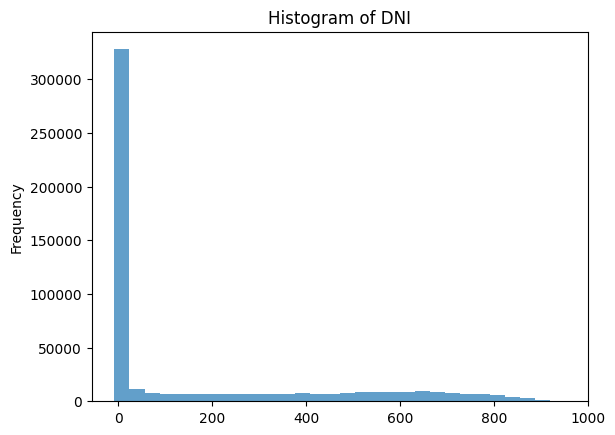

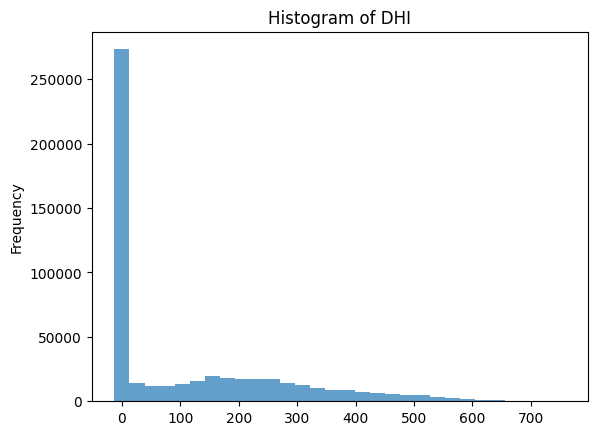

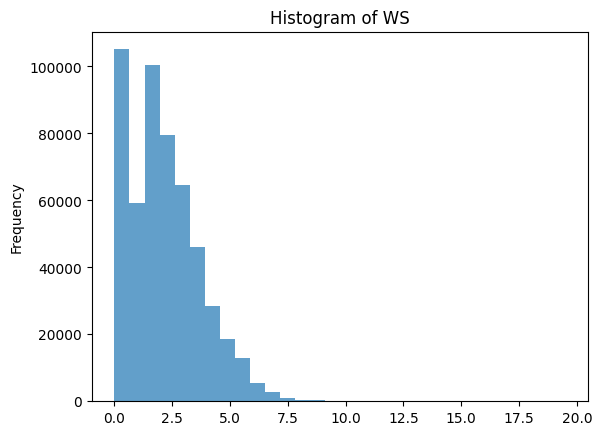

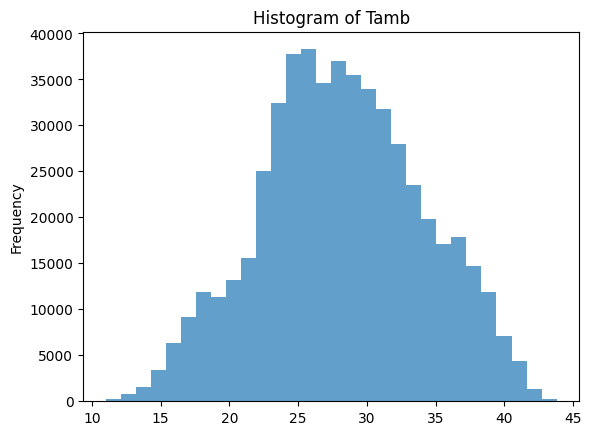

In [41]:
for col in ['GHI', 'DNI', 'DHI', 'WS', 'Tamb']:
    df[col].plot(kind='hist', bins=30, alpha=0.7, title=f"Histogram of {col}")
    plt.show()

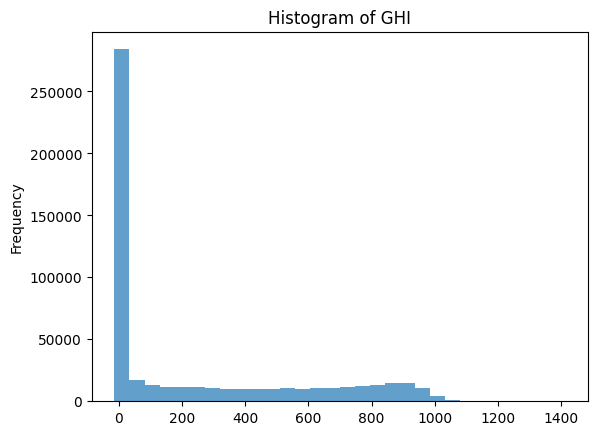

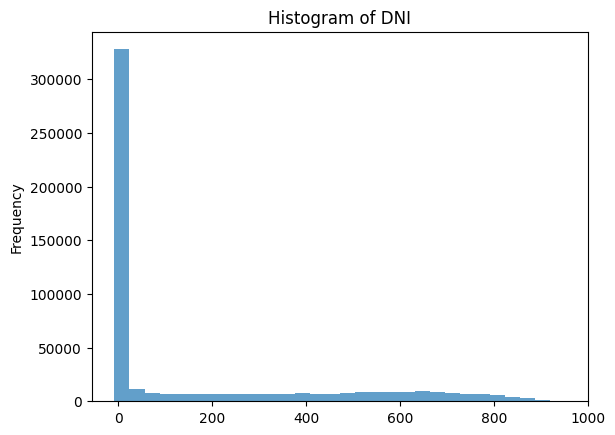

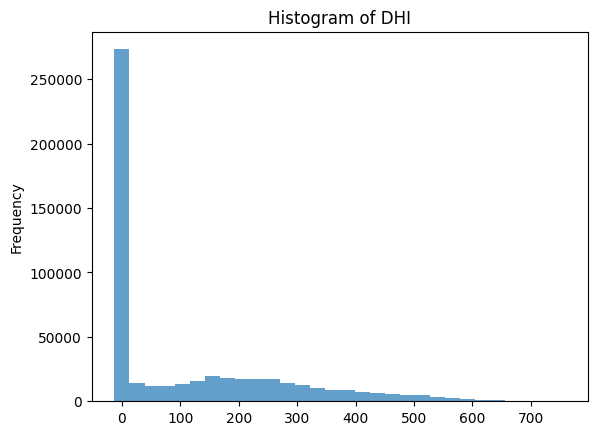

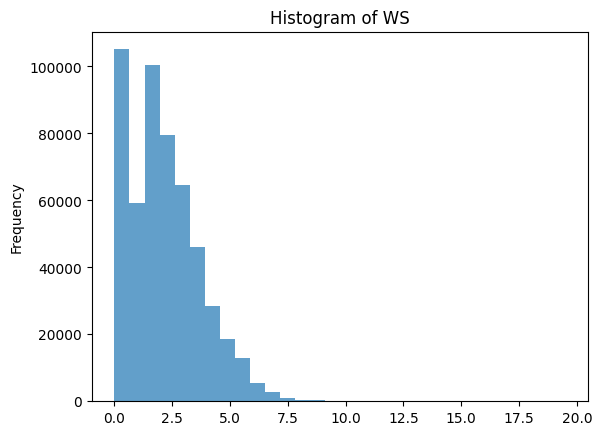

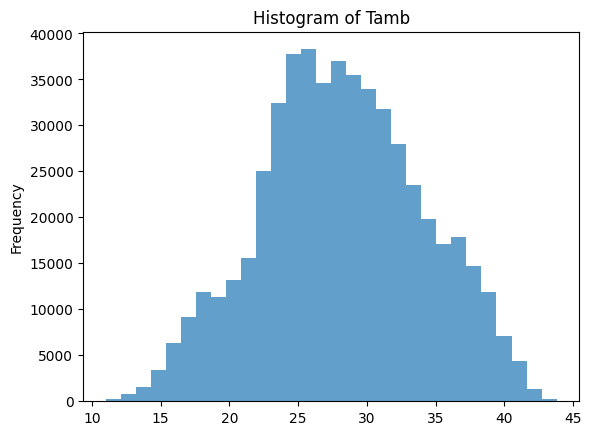

In [64]:
for col in ['GHI', 'DNI', 'DHI', 'WS', 'Tamb']:
    df[col].plot(kind='hist', bins=30, alpha=0.7, title=f"Histogram of {col}")
    plt.show()

Z-Score Analysis

In [44]:
# Calculate Z-scores
z_scores = df[['GHI', 'DNI', 'DHI']].apply(zscore)

# Flag data points with |Z-score| > 3
outliers = (np.abs(z_scores) > 3).sum()
print("Outliers flagged (Benin):\n", outliers)

Outliers flagged (Benin):
 GHI      89
DNI       0
DHI    3738
dtype: int64


Bubble Chart

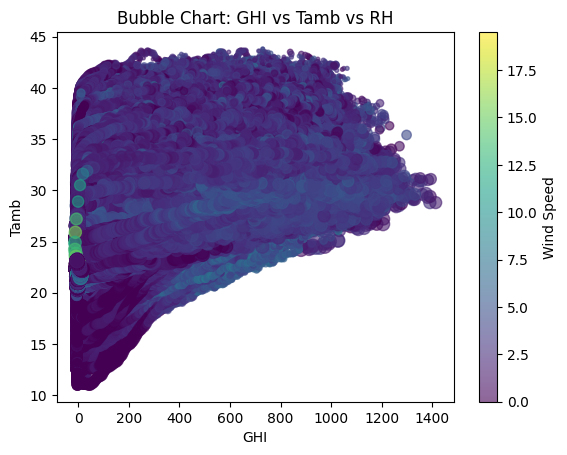

In [65]:
plt.scatter(df['GHI'], df['Tamb'], s=df['RH'], alpha=0.6, c=df['WS'], cmap='viridis')
plt.colorbar(label="Wind Speed")
plt.title("Bubble Chart: GHI vs Tamb vs RH")
plt.xlabel("GHI")
plt.ylabel("Tamb")
plt.show()


Data cleaning 

In [66]:
# Drop entirely null columns
df = df.dropna(axis=1, how='all')

# Fill missing values with mean
df.fillna(df.mean(), inplace=True)

# Remove negative values in specific columns
for col in ['GHI', 'DNI', 'DHI', 'ModA', 'ModB']:
    df[col] = df[col].clip(lower=0)